# **Introduction to OpenCV, Spatial Filtering and Edge Detection**
## Image Processing and Computer Vision - Lab Session No. 1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it

# Solutions

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!ls /content/drive/MyDrive/LabSessionsIPCV
!cp -r /content/drive/MyDrive/LabSessionsIPCV/lab_session_1_images.zip ./
!unzip lab_session_1_images.zip

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

## Exercise 1: pixel-wise differences between images


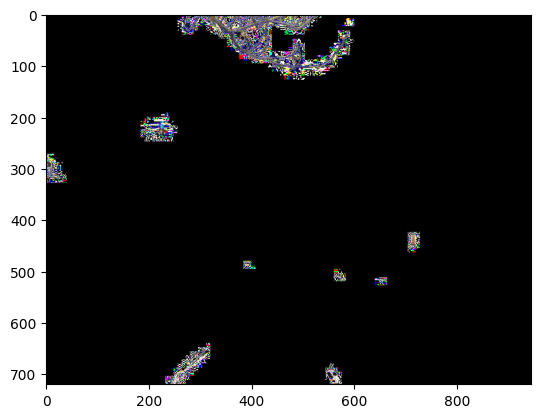

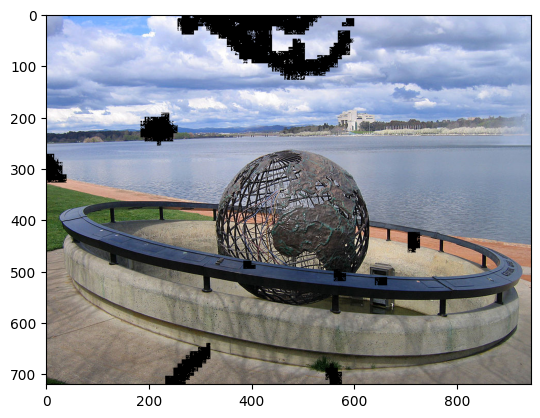

In [ ]:
# Read the images
image1 = cv2.imread("differences1.png")
image2 = cv2.imread("differences2.png")

# Compute the difference
abs_diff = np.abs(image1 - image2)

# Display the result
plt.imshow(cv2.cvtColor(abs_diff, cv2.COLOR_BGR2RGB))
plt.show()

# Compute the mean difference along last axis and mask the images based on the threshold (remember to create a copy!)
mean_rgb_diff = np.mean(abs_diff, axis=-1)
output_image = np.copy(image1)
output_image[mean_rgb_diff > 0] = 0

# Display the result
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

# Save the result on disk
cv2.imwrite("spot_the_difference.png", output_image);

## Exercise 2: Gaussian filtering

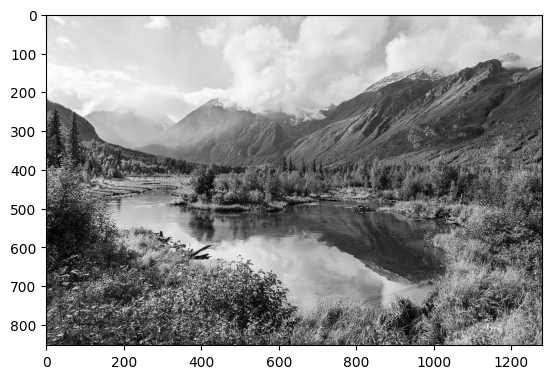


Time needed to apply a 1D convolution twice: 0.005 seconds.


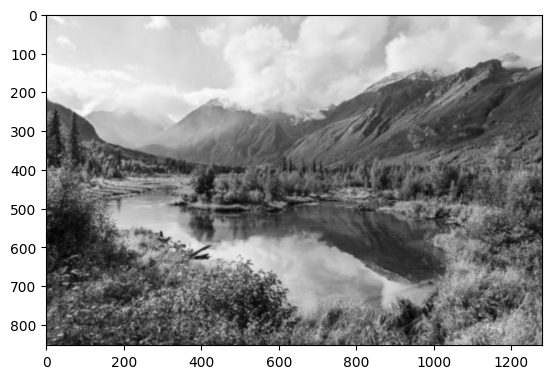


Time needed to apply a single 2D convolution: 0.027 seconds.


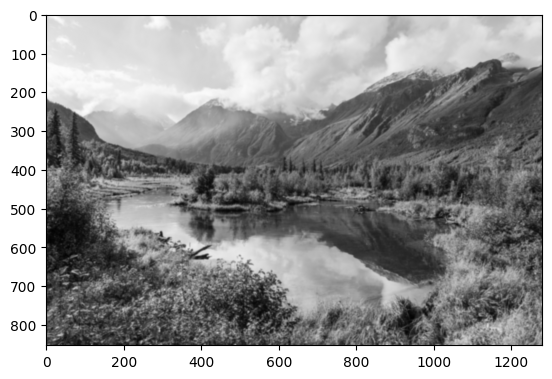


Time needed to apply the OpenCV API: 0.006 seconds.


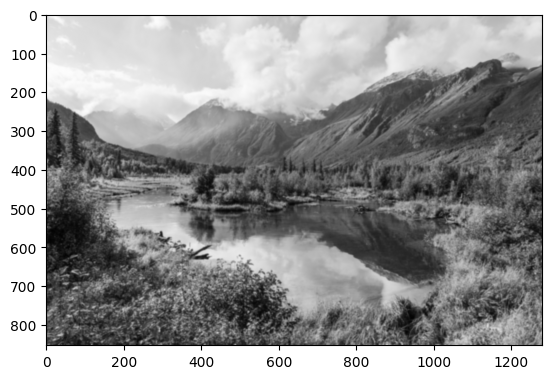

In [ ]:
# Read the image
img = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image before filtering
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

# Calculate k_size
sigma = 1.5
k_size = int(np.ceil((3*sigma))*2 + 1)  # rule of thumb for a good kernel size given sigma

# Find the 1D Gaussian kernel
gaussian_kernel_1D = cv2.getGaussianKernel(k_size, sigma)

# Apply the kernel
start = time.time()
img_tr = cv2.filter2D(img, -1, gaussian_kernel_1D)
img_tr = cv2.filter2D(img_tr, -1, gaussian_kernel_1D.transpose())
end = time.time()
print(f"\nTime needed to apply a 1D convolution twice: {(end - start):.3f} seconds.")

# Display the image after filtering
plt.imshow(img_tr, cmap="gray", vmin=0, vmax=255)
plt.show()

# Find the 2D Gaussian kernel
gaussian_kernel_2D = gaussian_kernel_1D.dot(gaussian_kernel_1D.transpose())

# Apply the kernel
start = time.time()
img_tr = cv2.filter2D(img, -1, gaussian_kernel_2D)
end = time.time()
print(f"\nTime needed to apply a single 2D convolution: {(end - start):.3f} seconds.")

# Display the image after filtering
plt.imshow(img_tr, cmap="gray", vmin=0, vmax=255)
plt.show()

# Use the OpenCV function GaussianBlur
start = time.time()
img_tr = cv2.GaussianBlur(img, (k_size, k_size), sigma)
end = time.time()
print(f"\nTime needed to apply the OpenCV API: {(end - start):.3f} seconds.")

# Display the image after filtering
plt.imshow(img_tr, cmap="gray", vmin=0, vmax=255)
plt.show()

## Exercise 3: bilateral filtering


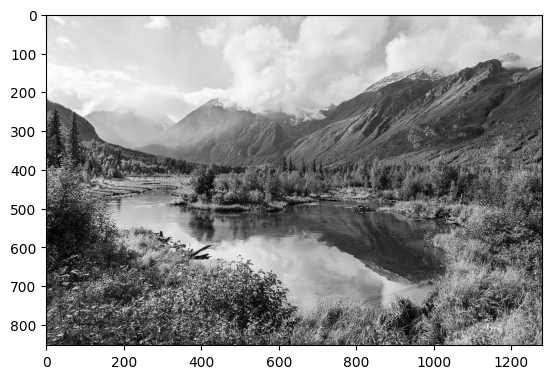

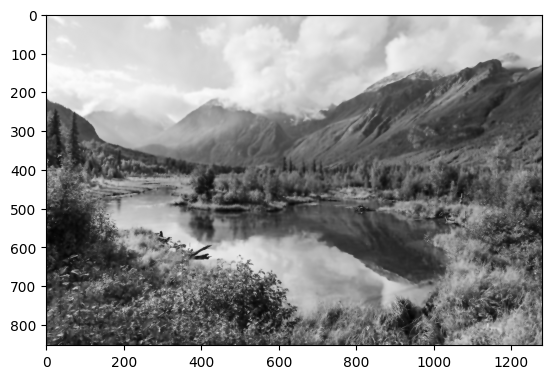

In [ ]:
# Read the image
img = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image before filtering
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

# Apply the kernel
img_bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# Display the image after filtering
plt.imshow(img_bilateral, cmap="gray", vmin=0, vmax=255)
plt.show()

## Exercise 3: Sobel filtering

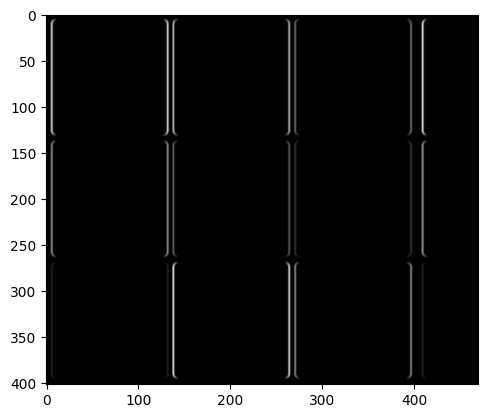

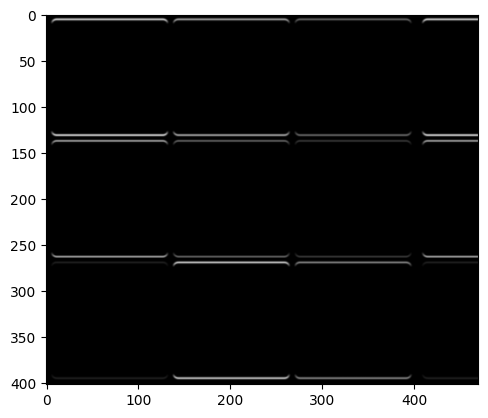

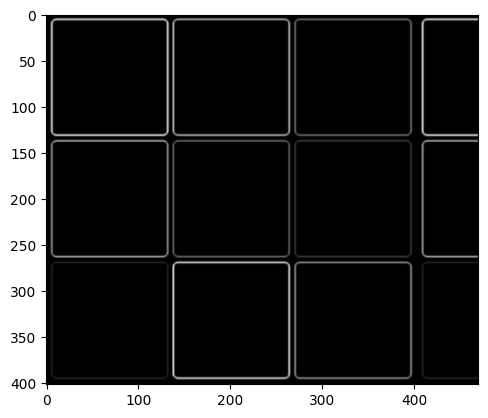

In [ ]:
# Read the image
img = cv2.imread("squares.png", cv2.IMREAD_GRAYSCALE)

# Define sobel kernels
sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) * 1/4
sobel_kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) * 1/4

# Compute |dI(x,y)/dx|
dx = cv2.filter2D(img.astype(float), -1, sobel_kernel_x)
dx = np.abs(dx)

# Display dx
plt.imshow(dx, cmap="gray", vmin=0, vmax=255)
plt.show()

# Compute |dI(x,y)/dy|
dy = cv2.filter2D(img.astype(float), -1, sobel_kernel_y)
dy = np.abs(dy)

# Display dy
plt.imshow(dy, cmap="gray", vmin=0, vmax=255)
plt.show()

# Compute the pixel-wise gradient module
sobel = np.maximum(dx, dy)

# Display the gradient module
plt.imshow(sobel, cmap="gray", vmin=0, vmax=255)
plt.show()